<a href="https://colab.research.google.com/github/nikita-shalamov/my-projects/blob/main/plotly_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly --upgrade
!pip install matplotlib --upgrade
!pip install geonamescache
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as subplots
import plotly.express as px

import geonamescache
import country_converter as coco

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#загрузим все таблицы
democracy_rating = pd.read_csv('gdrive/MyDrive/the_most_safety_cities/tables/democracy_rating.csv')
human_dev_rating = pd.read_csv('gdrive/MyDrive/the_most_safety_cities/tables/human_dev_rating.csv')
quality_of_life_rating = pd.read_csv('gdrive/MyDrive/the_most_safety_cities/tables/quality_of_life_rating.csv')
security_cities_rating = pd.read_csv('gdrive/MyDrive/the_most_safety_cities/tables/security_cities_rating.csv')
colors_democracy_rating = ['#660018', '#a8261f', '#f46d43', '#fdae61', '#fee08b', '#a6d96a', '#66bd63', '#1a9850', '#006800']

###Вывод таблиц

In [ ]:
democracy_rating.head(2)

,rank,country,regime_type,overall_score,electorat_and_pluralism,government,poli­tical_partici­pation,poli­tical_cul­ture,civil_liber­ties
0,1,Norway,Full democracy,9.75,10.0,9.64,10.00,10.00,9.12
1,2,New Zealand,Full democracy,9.37,10.0,8.93,9.44,8.75,9.71


In [ ]:
human_dev_rating.head(2)

,rank,country,hdi,average_annual_growth
0,1,Switzerland,0.962,0.19%
1,2,Norway,0.961,0.19%


In [ ]:
quality_of_life_rating.head(2)

,Unnamed: 0,rank,city,city_eng,country,city_lat_geo,city_lon_geo
0,0,1,Vienna,Vienna,Austria,48.208354,16.372504
1,1,2,Zürich,Zurich,Switzerland,47.374449,8.541042


In [ ]:
security_cities_rating.head(2)

,0,overall_rating,overall_rating_country,overall_score,digital_sec,score1,health_sec,score2,infrastucture_sec,score3,personal_sec,score4,environmental_sec,score5
0,1,Copenhagen,Denmark,82.4,Sydney,83.2,Tokyo,87.7,Hong Kong,93.4,Copenhagen,86.4,Wellington,91.7
1,2,Toronto,Canada,82.2,Singapore,82.8,Singapore,84.1,Singapore,92.1,Amsterdam,80.5,Toronto,90.3


###Индекс демократии

In [ ]:
trace = go.Choropleth(z=democracy_rating['overall_score'],
                      locations=democracy_rating['country'],
                      locationmode='country names',
                      colorscale=colors_democracy_rating
                      )
layout = go.Layout(
    title="Democracy Rating by Countries",
    title_x = 0.5)
fig = go.Figure(data=trace, layout=layout)
fig

In [ ]:
# Create a Figure object with a subplot layout with two plots side by side
fig = subplots.make_subplots(rows=1, cols=2, subplot_titles=("Самый высокий уровень демократии", "Самый низкий уровень демократии"))

# Use the `Bar` trace type to create the first bar plot
fig.add_trace(go.Bar(x=democracy_rating['country'].head(5), y=democracy_rating['overall_score'].head(5), marker_color=['#009900', '#00CC00', '#00CC00', '#00CC00', '#00CC00']), row=1, col=1)

# Use the `Bar` trace type to create the second bar plot
fig.add_trace(go.Bar(x=democracy_rating['country'].tail(5), y=democracy_rating['overall_score'].tail(5), marker_color=['#CC0000', '#CC0000', '#990000', '#990000', '#660000']), row=1, col=2)

# Show the figure
fig

###Индекс человеческого развития

Найдем для каждой страны ее континент, чтобы узнать средний hdi по каждому континенту

In [ ]:
# список стран 
gc = geonamescache.GeonamesCache()
countries = gc.get_countries()

# подключаем конвертер стран
cc = coco.CountryConverter()

continents = {'AF': 'Africa', 'AS': 'Asia', 'NA': 'North America', 'SA': 'South America', 'OC': 'Oceania', 'EU': 'Europe'}

# переводим страны в формат ISO2 в таблице с человеческим развитием и находим континент
countries_iso2 = cc.convert(names = human_dev_rating['country'], to='ISO2')
human_dev_rating['continent'] = [continents[countries[i]['continentcode']] for i in countries_iso2]

# то же самое для таблицы с индексом демократии
countries_iso2 = cc.convert(names = democracy_rating['country'], to='ISO2')
democracy_rating['continent'] = [continents[countries[j]['continentcode']] for j in countries_iso2]

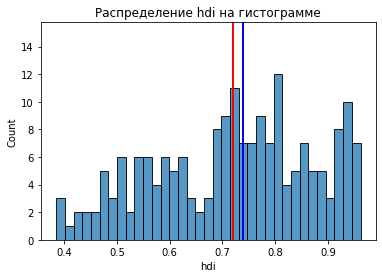

In [ ]:
fig, ax = plt.subplots()
sns.histplot(human_dev_rating['hdi'], bins=35, ax=ax).set(title='Распределение hdi на гистограмме')
ax = plt.axline((human_dev_rating["hdi"].mean(), 0), (human_dev_rating["hdi"].mean(), 15), linewidth=2, color='r')
ax = plt.axline((human_dev_rating["hdi"].median(), 0), (human_dev_rating["hdi"].median(), 15), linewidth=2, color='blue')

In [ ]:
hdi_mean_by_continents = human_dev_rating.groupby('continent', as_index=False).agg({'hdi': 'mean'}).sort_values(by='hdi', ascending=False)
hdi_by_s_america = human_dev_rating.query('continent == "South America"').sort_values(by='hdi', ascending=False).head(5)
hdi_by_n_america = human_dev_rating.query('continent == "North America"').sort_values(by='hdi', ascending=False).head(5)
hdi_by_asia = human_dev_rating.query('continent == "Asia"').sort_values(by='hdi', ascending=False).head(5)

In [ ]:
fig = px.scatter(data_frame=human_dev_rating, x='continent', y='hdi',color='continent', name='coury').update_layout(width=800, height=360, margin={'t':0, 'b':0})
fig.update
fig

In [ ]:
human_dev_and_democracy = human_dev_rating.merge(democracy_rating, left_on='country', right_on='country', how='inner')
cor_cof = np.corrcoef(x=human_dev_and_democracy['overall_score'], y=human_dev_and_democracy['hdi'])[0, 1]
fig = px.scatter(data_frame=human_dev_and_democracy, x='overall_score', y='hdi', color='continent_x', hover_name='country', 
                 title='Democracy and HDI')

fig.update_layout(width=850, height=425, margin={'t':40, 'b':0}, title_x=0.5,
                  xaxis_title="Democracy Index",
                  yaxis_title="HDI",
                  legend_title='Continent')

fig.update_traces(marker_size=8)
fig.add_annotation(x=1.6, y=0.96, showarrow=False,
            text=f'Корреляция = {round(cor_cof, 3)}',
            font=dict(size=13))
fig

In [ ]:
fig = subplots.make_subplots(rows=1, cols=3, subplot_titles=("Higher hdi by South America", "Higher hdi by North America", 'Higher hdi by Asia'),
                             specs = [[{}, {}, {}]], horizontal_spacing = 0.05, vertical_spacing=0.15)

# добавляем графики
fig.add_trace(go.Bar(x=hdi_by_s_america['country'], y=hdi_by_s_america['hdi'].head(5)), row=1, col=1)
fig.add_trace(go.Bar(x=hdi_by_n_america['country'], y=hdi_by_n_america['hdi'].head(5)), row=1, col=2)
fig.add_trace(go.Bar(x=hdi_by_asia['country'], y=hdi_by_asia['hdi'].head(5)), row=1, col=3)

fig.update_layout(width=1200,height=300, margin={'t':25, 'b':0})

fig.show()

In [ ]:
fig = px.bar(data_frame=hdi_mean_by_continents, x='continent', y='hdi')
fig.update_layout(width=560,height=350, title='Mean hdi by continents', title_x=0.5, margin={'t':30})
fig

In [ ]:
trace = go.Choropleth(z=human_dev_rating['hdi'], 
                      locations=human_dev_rating ['country'],
                      locationmode='country names',
                      colorscale=px.colors.diverging.BrBG,
                      zmid=0.7)
layout = go.Layout(title='Human Development Rating by Countries', 
                   title_x = 0.5)
fig = go.Figure(data=trace, layout=layout)
fig

In [ ]:
def with_out_percent(x): 
  return x[:-1]
human_dev_rating['average_annual_growth'] = human_dev_rating['average_annual_growth'].apply(with_out_percent)

In [ ]:
trace1 = go.Choropleth(z=human_dev_rating['average_annual_growth'], 
                      locations=human_dev_rating ['country'],
                      locationmode='country names',
                      colorscale=px.colors.diverging.BrBG,
                      zmid=0,
                      colorbar=dict(title="%"))
layout1 = go.Layout(title='Human Development Growth by Countries', 
                   title_x = 0.5)
fig2 = go.Figure(data=trace1, layout=layout1)
fig2

###Рейтинг городов по качеству жизни

In [ ]:
quality_of_life_rating.head(2)

,Unnamed: 0,rank,city,city_eng,country,city_lat_geo,city_lon_geo
0,0,1,Vienna,Vienna,Austria,48.208354,16.372504
1,1,2,Zürich,Zurich,Switzerland,47.374449,8.541042


In [ ]:
# from geopy import Nominatim
# geolocator = Nominatim(user_agent="specify_your_app_name_here")

# lat_geo = []
# lon_geo = []
# for city in list(quality_of_life_rating['city_eng']):
#   geo = geolocator.geocode(city)
#   lat_geo.append(geo.raw['lat'])
#   lon_geo.append(geo.raw['lon'])
# print(lat_geo)
# print(lon_geo)

In [ ]:
trace3 = go.Scattermapbox(lat=quality_of_life_rating['city_lat_geo'], 
                          lon=quality_of_life_rating['city_lon_geo'], 
                          text=list(quality_of_life_rating['city_eng']),
                          marker = dict(color=quality_of_life_rating['rank'],
                                        colorbar_title="Rank"))

layout = go.Layout(mapbox_style="open-street-map",
                   margin={"r":150,"t":50,"l":150,"b":0},
                   title='Quality of Life Rating by Cities',
                   title_x=0.5)
fig = go.Figure(data=trace3, layout=layout)
fig.show()

###Рейтинг городов по безопасности

In [ ]:
security_cities_rating.head(5)

,0,overall_rating,overall_rating_country,overall_score,digital_sec,score1,health_sec,score2,infrastucture_sec,score3,personal_sec,score4,environmental_sec,score5
0,1,Copenhagen,Denmark,82.4,Sydney,83.2,Tokyo,87.7,Hong Kong,93.4,Copenhagen,86.4,Wellington,91.7
1,2,Toronto,Canada,82.2,Singapore,82.8,Singapore,84.1,Singapore,92.1,Amsterdam,80.5,Toronto,90.3
2,3,Singapore,Singapore,80.7,Copenhagen,82.2,Hong Kong,84.0,Copenhagen,89.0,Frankfurt,80.3,Washington DC,87.6
3,4,Sydney,Australia,80.1,Los Angeles,82.0,Melbourne,81.9,Toronto,88.6,Stockholm,79.7,Bogota,85.5
4,5,Tokyo,Japan,80.0,San Francisco,82.0,Osaka,81.8,Tokyo,87.7,Brussels,79.2,Milan,84.9


In [ ]:
from geopy.geocoders import Nominatim
overall_rating_lat = []
overall_rating_lon = []

geolocator = Nominatim(user_agent="specify_your_app_name_here", timeout=3)
for city in list(security_cities_rating['overall_rating']):
    overall_rating_lat.append(float(geolocator.geocode(city).raw['lat']))
    overall_rating_lon.append(float(geolocator.geocode(city).raw['lon']))

In [ ]:
px.set_mapbox_access_token("Your mapbox API Token")
fig = px.scatter_mapbox(security_cities_rating, lat=overall_rating_lat, lon=overall_rating_lon, color="0",
                        hover_name='overall_rating', mapbox_style="open-street-map", zoom=0.5, title="The most safety cities", 
                        size='overall_score', size_max=10)
fig.update_layout(margin={'b':5, 't':28}, title_x=0.5,width=800, height=400, coloraxis_colorbar=dict(title="Rating"))
fig.show()

In [ ]:
fig = px.bar(data_frame=security_cities_rating.head(7), x='overall_rating', y='overall_score')
fig.update_layout(width=700,height=350, title='The most safety cities', title_x=0.5, margin={'t':30})
fig